<a href="https://colab.research.google.com/github/Amit-Padye/Logistic-regression-with-cross-validation-churn-prediction-/blob/main/CH_Amit_Padye_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt



In [61]:
df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,8215-NGSPE,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


##customerID

In [65]:
df['customerID'].nunique()

7043

In [66]:
df.drop('customerID',axis=1,inplace=True)

In [67]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#gender

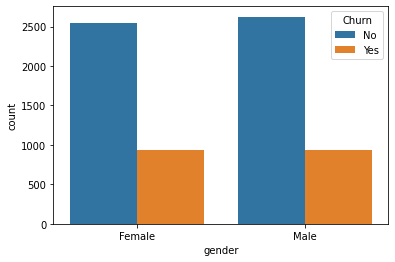

In [68]:
sns.countplot(x='gender',hue='Churn',data=df)

In [69]:
df.drop('gender',axis=1,inplace=True)

##SeniorCitizen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


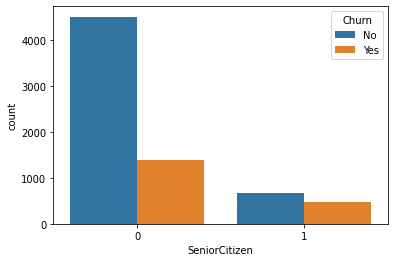

In [70]:
sns.countplot('SeniorCitizen',hue='Churn',data=df)

In [71]:
df.drop('SeniorCitizen',axis=1,inplace=True)

##partner

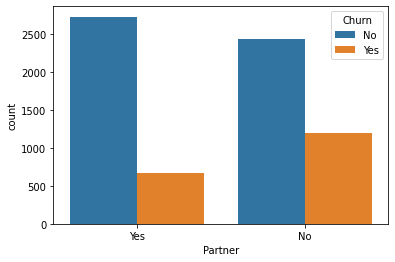

In [72]:
sns.countplot(x='Partner',hue='Churn',data=df)

In [73]:
def dummy(valu):
  if valu=='Yes':
    return 1
  else:
    return 0

In [74]:
df['Partner']=df['Partner'].apply(lambda x: dummy(x))

##Dependents

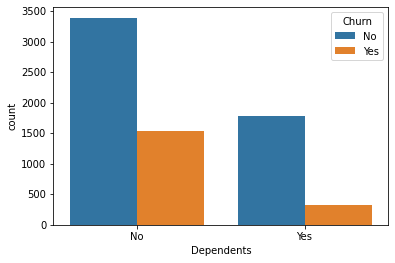

In [75]:
sns.countplot(x='Dependents',hue="Churn",data=df)

In [76]:
df['Dependents']=df['Dependents'].apply(lambda x: dummy(x))

In [77]:
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##tenure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


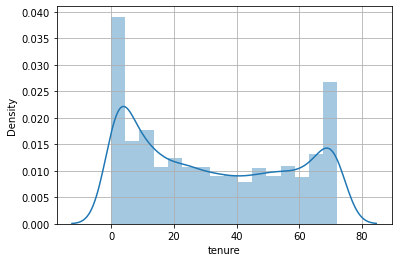

In [78]:
sns.distplot(df['tenure'])
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


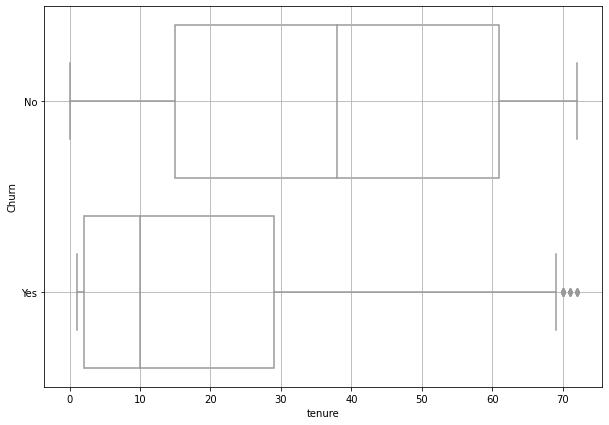

In [79]:
plt.figure(figsize=(10,7))
sns.boxplot(df['tenure'],df['Churn'],color='w')
plt.grid()

#phoneservise

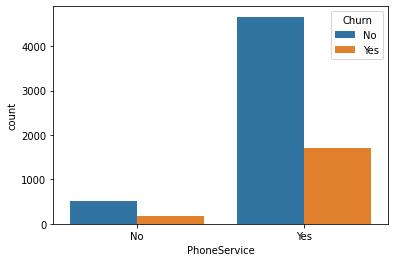

In [80]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

In [81]:
df['PhoneService']=df['PhoneService'].apply(lambda x: dummy(x))

In [82]:
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##MultipleLines

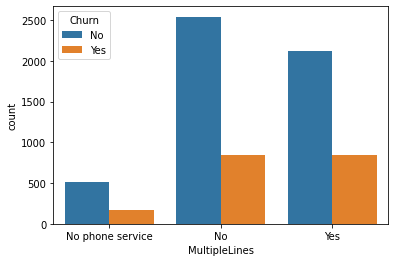

In [83]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

In [84]:
d=pd.get_dummies(df['MultipleLines'],drop_first=True)
df=pd.concat([df,d],axis=1)

In [85]:
df.drop('MultipleLines',axis=1,inplace=True)

In [86]:
df.shape

(7043, 19)

##InternetService

In [87]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


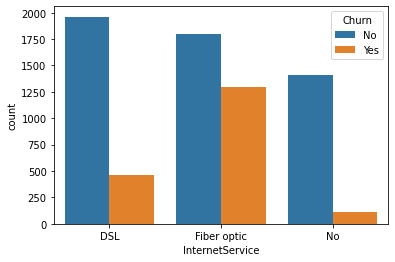

In [88]:
sns.countplot('InternetService',hue='Churn',data=df)

In [89]:
d=pd.get_dummies(df['InternetService'],drop_first=True)
df=pd.concat([df,d],axis=1)

In [90]:
df.drop('InternetService',axis=1,inplace=True)

In [91]:
df.head()

,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
0,1,0,1,0,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,0
1,0,0,34,1,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,0,0
2,0,0,2,1,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,0,0
3,0,0,45,0,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0
4,0,0,2,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,0


In [92]:
cat=list(df.loc[:,df.dtypes==np.object].columns)
cat

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [93]:
cat=['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'Churn','PaperlessBilling']

In [94]:
for col in cat:
   df[col]=df[col].apply(lambda x: dummy(x))
   

In [95]:
df.head()

,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
0,1,0,1,0,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0,1,0,0,0
1,0,0,34,1,1,0,1,0,0,0,0,0,Mailed check,56.95,1889.5,0,0,0,0,0
2,0,0,2,1,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1,0,0,0,0
3,0,0,45,0,1,0,1,1,0,0,0,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0
4,0,0,2,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,0,0,1,0


In [96]:
df.drop('PaymentMethod',axis=1,inplace=True)

In [97]:
df.head()

,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
0,1,0,1,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0,0,0
1,0,0,34,1,1,0,1,0,0,0,0,0,56.95,1889.5,0,0,0,0,0
2,0,0,2,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,0,0
3,0,0,45,0,1,0,1,1,0,0,0,0,42.30,1840.75,0,1,0,0,0
4,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7043 non-null   int64  
 1   Dependents        7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   StreamingTV       7043 non-null   int64  
 9   StreamingMovies   7043 non-null   int64  
 10  Contract          7043 non-null   int64  
 11  PaperlessBilling  7043 non-null   int64  
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7043 non-null   object 
 14  Churn             7043 non-null   int64  
 15  No phone service  7043 non-null   uint8  
 16  Yes               7043 non-null   uint8  


##TotalCharges

In [99]:
df.loc[488,'TotalCharges']

' '

In [100]:
df[df['TotalCharges']==' ']

,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,No phone service,Yes,Fiber optic,No
488,1,1,0,0,1,0,1,1,1,0,0,1,52.55,,0,1,0,0,0
753,0,1,0,1,0,0,0,0,0,0,0,0,20.25,,0,0,0,0,1
936,1,1,0,1,1,1,1,0,1,1,0,0,80.85,,0,0,0,0,0
1082,1,1,0,1,0,0,0,0,0,0,0,0,25.75,,0,0,1,0,1
1340,1,1,0,0,1,1,1,1,1,0,0,0,56.05,,0,1,0,0,0
3331,1,1,0,1,0,0,0,0,0,0,0,0,19.85,,0,0,0,0,1
3826,1,1,0,1,0,0,0,0,0,0,0,0,25.35,,0,0,1,0,1
4380,1,1,0,1,0,0,0,0,0,0,0,0,20.00,,0,0,0,0,1
5218,1,1,0,1,0,0,0,0,0,0,0,1,19.70,,0,0,0,0,1
6670,1,1,0,1,0,1,1,1,1,0,0,0,73.35,,0,0,1,0,0


In [101]:
df['TotalCharges'].replace(' ',0,inplace=True)

In [102]:

df['TotalCharges']= pd.to_numeric(df["TotalCharges"])

In [103]:
x=df.drop('Churn',axis=1)
y=df['Churn']

#Logistic Regression

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.20)

In [50]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [51]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
train_preds = clf.predict_proba(x_train)
test_preds = clf.predict_proba(x_test)

In [53]:
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_train, train_class_preds)
print(cm)


[[3729  404]
 [ 699  802]]


In [ ]:
f1 = f1_score(y_train, train_class_preds)

prec = precision_score(y_train, train_class_preds)

recall = recall_score(y_train, train_class_preds) 

In [119]:
f1,prec,recall

(0.592537864794976, 0.6650082918739635, 0.5343104596935376)

#Cross validation

In [109]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate




In [105]:
logistic = LogisticRegression()

In [106]:
scoring = ['accuracy']
scores = cross_validate(logistic,x_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.801, test=0.817), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.805, test=0.799), total=   0.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.803, test=0.798), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.807, test=0.786), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.803, test=0.813), total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [107]:
scores['train_accuracy']

array([0.8005325 , 0.80474817, 0.80341691, 0.80652319, 0.80279503])

In [108]:
scores['test_accuracy']

array([0.81721384, 0.7985803 , 0.79769299, 0.78615794, 0.81261101])